In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from tqdm import tqdm

**Problema 1**

In [2]:
Ns = 1000 #sigma
Nt = 1000 #tau

s = np.linspace(-10,10,Ns)
t = np.linspace(-10,10,Nt)

deltas = s[1] - s[0]
deltat = t[1] - t[0]

lamda =  2*(1/(deltas**2) + 1/(deltat**2) ) 

In [3]:
#Condiciones de frontera   
def ui(s_,t_):
    if s_*t_<=10:
        return 50.
    else:
        return 0.
def InitV():
    V = np.zeros((Ns,Nt))
    for i in range(0,len(s)):
        for j in range(0, len(t)):
            V[i, j] = ui(s[i], t[j])
    return V

In [4]:
def Relajacion(V,s_,t_,Nit = int(1e2), omega = 1.5 ,tolerancia = 1e-3):
    itmax = 0
    for it in tqdm(range(Nit)):
        dmax = 0.
        #Los condicionles sobre el límite son para evitar iterar más allá de la frontera
        for i in reversed(range(1,len(s_)-1)):
                for j in reversed(range(1,len(t_)-1)):
                    if j == len(t_) - 1:
                        b = 1
                    else:
                        b = j+1
                    iniv =   ( (V[i+1,j]+V[i-1,j])/(deltas**2) ) + ( (V[i,b]+V[i,j-1])/(deltat**2) ) 
                    iniv /= lamda
                # Matriz de resta, omega será un factor que ayude a determinar el paso entre iteraciones
                    r1 = omega*(iniv - V[i,j])
                # Actualizo la matrix
                    V[i,j] += r1
                    if np.abs(r1) > dmax:
                        dmax = r1
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return V

V = InitV()
Vf1 =  Relajacion(V,s,t)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:42<00:00,  3.42s/it]


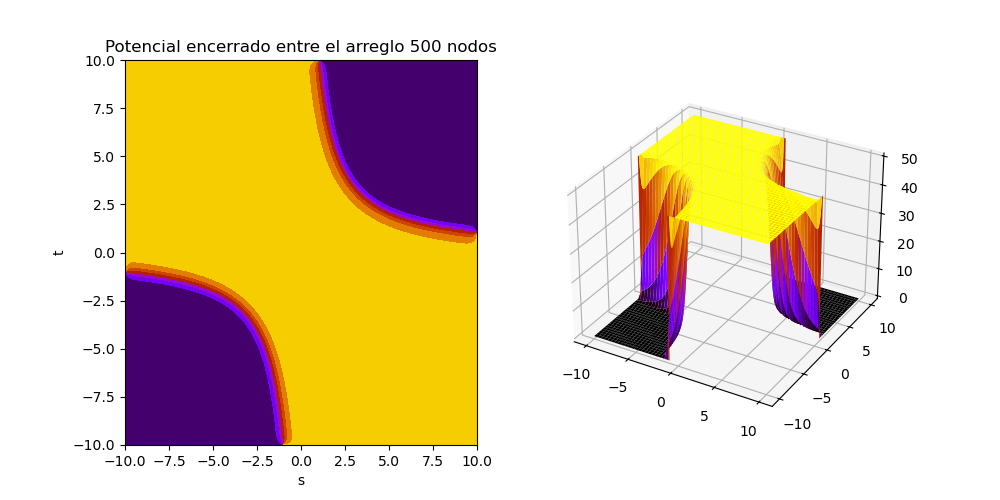

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

S, T = np.meshgrid(s,t)

ax.contourf(S,T,Vf1.T,cmap=cm.gnuplot)
ax.set_xlabel('s')
ax.set_ylabel('t')
ax.set_title('Potencial encerrado entre el arreglo 500 nodos')

ax1.plot_surface(S,T,Vf1.T,cmap=cm.gnuplot)

**Problema 2**

In [6]:
#Puntos para la red de condiciones iniciales.
Nr = 1000
Nphi = 1000

r = np.linspace(0.1,10,Nr) #De 0cm a 10cm el radio de alambre
phi = np.linspace(0,np.pi,Nphi)

dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi 

In [7]:
#Condiciones de frontera
def uip(r,phi_):
      if phi_==phi[0] or phi_==phi[-1]: #Sobre la frontera y en el rango de ángulos mida 50V
          return 0. 
      if r == 10: #Sobre la frontera y en el rango de ángulos mida 50cos(phi)
         return 50*np.cos(phi_)
      else:
        return 0.
def InitVp():
    
    Vp = np.zeros((Nr,Nphi))
    for i in range(0,len(r)):
        for j in range(0, len(phi)):
            Vp[i, j] = uip(r[i], phi[j])
    return Vp

In [8]:
def Relajacion(V_,r,phi,Nit = int(1e2), omega = 1.5 ,tolerancia = 1e-3):
    itmax = 0
    for it in tqdm(range(Nit)):
        dmax = 0.
        for i in reversed(range(1, len(r) - 1)):
            for j in reversed(range(1,len(phi)-1)):
                #Este condicional se hace con el fin de evitar iterar hacia adelante en la frontera 
                if j == len(phi) - 1:
                    b = 1 
                else:
                    b = j+1
                #Expresión que se dedujo al inicio
                c = 2 - dr/r[i] + 2*(lambda_/r[i])**2
                v = V_[i+1,j] + (1-dr/r[i])*V_[i-1,j] + ((lambda_/r[i])**2)*(V_[i,b] + V_[i,j-1])
                v /= c
                # Matriz de resta, omega será un factor que ayude a determinar el paso entre iteraciones
                r1 = omega*(v - V_[i,j])
                # Actualizo la matrix
                V_[i,j] += r1
                if np.abs(r1) > dmax:
                    dmax = r1
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return V_

Vp = InitVp()
Vf1p=  Relajacion(Vp,r,phi)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:06<00:00,  4.27s/it]


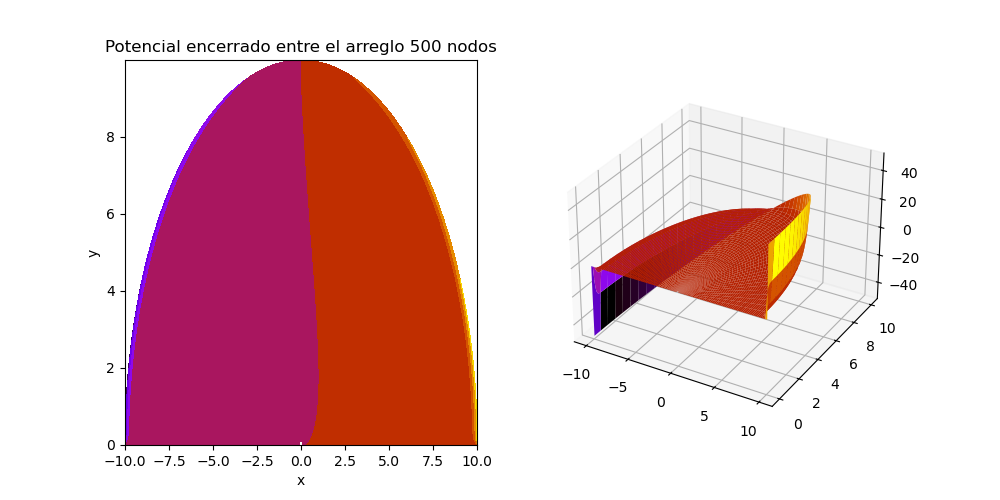

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

R, Phi = np.meshgrid(r,phi)
X,Y = R*np.cos(Phi),R*np.sin(Phi)

ax.contourf(X,Y,Vp.T,cmap=cm.gnuplot)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Potencial encerrado entre el arreglo 500 nodos')
ax1.plot_surface(X,Y,Vp.T,cmap=cm.gnuplot)

plt.show()